# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [4]:
# Import needed modules here

import matplotlib.pyplot as plt
import numpy as np
import copy

In [18]:
# Your code here...

## Creat custom function for user inputs

def myfunt(state,data="cases"):
    "Funciton will grab the desired user state and either death or case counts: default is case counts"

    CovidFile= open ("covidData_4.7.20.csv","r")   ## read in file 

    statelines=[]  #creat empty lists to append to 

    for i in CovidFile.readlines():
        line=i.strip().split(",") #strip line of extra variable and split by commas
        if state==line[2]:
            statelines.append(line) ## append the list with the data of the desired state
        
    # create a var called columnn to get data for case counts or death counts 
    if data=="cases":
        column=-2   ## var to use for calling case counts (to overcome issue with fips numbers)
    elif data=="deaths":
        column=-1  ## if input is not case then var will grab the death count (the last colum in the list)
    
    counts=[]   ##empty list to store count data
    dates =[]   ## empty list to store dates
    
    for i in statelines:    ## append the count data for either death or counts to the counts list
        n=i[column]
        date = i[0]
        counts.append(int(n))   ## converts the string numbers to real numbers
        dates.append(date)
    return [state,data,counts,dates]  ## returns state, data, and counts that will be used in the plot

    
result= myfunt("Washington","cases")                    #test function
print(result)




['Washington', 'cases', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 4, 4, 2, 4, 11, 2, 4, 15, 3, 4, 1, 22, 5, 4, 1, 1, 33, 8, 4, 1, 1, 52, 17, 4, 1, 1, 1, 1, 59, 1, 18, 4, 1, 1, 1, 1, 72, 1, 3, 26, 4, 1, 1, 1, 1, 91, 1, 1, 4, 36, 4, 1, 1, 1, 1, 117, 1, 1, 7, 45, 4, 1, 1, 1, 1, 191, 2, 1, 14, 1, 61, 4, 1, 1, 1, 1, 1, 1, 235, 2, 3, 17, 1, 69, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 271, 2, 3, 17, 2, 107, 4, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 329, 3, 3, 19, 3, 132, 4, 3, 1, 1, 2, 1, 3, 1, 1, 1, 6, 1, 389, 3, 3, 1, 26, 3, 154, 7, 3, 1, 2, 3, 1, 3, 1, 1, 1, 6, 3, 421, 5, 3, 1, 1, 1, 29, 4, 175, 7, 4, 1, 3, 4, 1, 4, 1, 6, 1, 7, 3, 489, 7, 3, 1, 1, 1, 44, 7, 199, 7, 4, 1, 3, 4, 3, 4, 1, 1, 6, 1, 14, 4, 518, 7, 3, 1, 1, 1, 1, 44, 9, 265, 7, 5, 1, 6, 5, 1, 3, 4, 1, 1, 6, 1, 16, 4, 563, 9, 4, 1, 1, 1, 1, 56, 14, 309, 7, 6, 1, 7, 9, 2, 3, 1, 4, 1, 1, 8, 1, 17, 4, 693, 12, 4, 2, 1, 1, 1, 75, 18, 347, 9, 6, 1, 7, 9, 3, 3, 

['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-24', '2020-02-25', '2020-02-25', '2020-02-26', '2020-02-26', '2020-02-27', '2020-02-27', '2020-02-28', '2020-02-28', '2020-02-28', '2020-02-29', '2020-02-29', '2020-02-29', '2020-03-01', '2020-03-01', '2020-03-01', '2020-03-02', '2020-03-02', '2020-03-02', '2020-03-02', '2020-03-03', '2020-03-03', '2020-03-03', '2020-03-03', '2020-03-04', '2020-03-04', '2020-03-04', '2020-03-04', '2020-03-04', '2020-03-05', '2020-03-05', '2020-03-05', '2020-03-05', '2020-03-05', '2020-03-06', '2020-03-06', '2020

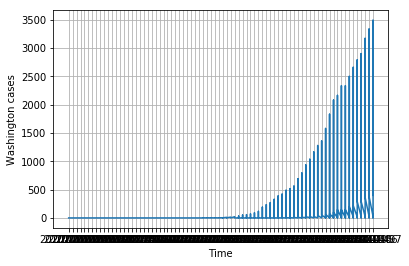

In [19]:
# Use your function to create a plot here

# User input desired state and counts data

results=myfunt("Washington","cases")

## creating line plot of desired state 
y=results[2]
#x= range (len(y))
x = results[3]
plt.xlabel("Time")
plt.ylabel(results[0]+" " + results[1])
plt.grid(True)
plt.plot(x,y) 

print(x)
print(y)

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [20]:
# Your code here

## Creat custom function for user inputs

def myfunt2(parish,state,data="cases"):
    "Funciton will grab the desired user state and either death or case counts: default is case counts"

    CovidFile= open ("covidData_4.7.20.csv","r")   ## read in file 
        
    
    statelines=[]  #creat empty lists to append to 

    for i in CovidFile.readlines():
        line=i.strip().split(",") #strip line of extra variable and split by commas 
        if state==line[2] and parish==line[1]:    ## append the list with the parish/state match
            statelines.append(line)
        
    # create a var called columnn to get data for case counts or death counts 
    if data=="cases":
        column=-2   ## var to use for calling case counts (to overcome issue with fips numbers)
    elif data=="deaths":
        column=-1  ## if input is not case then var will grab the death count (the last colum in the list)
    
    
    counts=[]   ##empty list to store count data
    dates = []   # empty list for dates
    
    for i in statelines:    ## append the count data for either death or counts to the counts list
        n=i[column]
        date = i[0]
        counts.append(int(n))   ## converts the string numbers to real numbers
        dates.append(date)
    return [parish,state,data,counts,dates]  ## returns state, data, and counts that will be used in the plot

    
result= myfunt2("Snohomish","Washington","cases")                    #test function
print(result)




['Snohomish', 'Washington', 'cases', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 8, 17, 18, 26, 36, 45, 61, 69, 107, 132, 154, 175, 199, 265, 309, 347, 384, 446, 480, 518, 613, 633, 778, 913, 912, 1067, 1126, 1228, 1304, 1375, 1449, 1502, 1558, 1602, 1658], ['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07

['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020

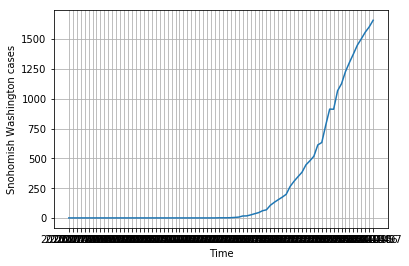

In [21]:
# Use your function to create a plot here

results=myfunt2("Snohomish","Washington","cases")

## creating line plot of desired state 
y=results[3]
x=results[4]
#x= range (len(y))
plt.xlabel("Time")
plt.ylabel(results[0]+ " " + results[1]+  " " + results[2])
plt.grid(True)
plt.plot(x,y) 

print(x)
print(y)